In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_channel_file(filepath):
    df = pd.read_csv(filepath, sep='\\s+', names=['Timestamp','Reading'], parse_dates=['Timestamp'], header=0)
    return df

In [77]:
def convert_timestamp(df):
    timestamp = df.Timestamp.apply(lambda d: datetime.datetime.fromtimestamp(int(d), tz=pytz.timezone('GMT')).strftime("%Y-%m-%d %H:%M:%S"))
    return timestamp

In [78]:
def plot(xlabel, ylabel, df):
    fig= plt.figure(figsize=(20,8))
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.xticks(rotation='vertical')
    plt.plot(df[xlabel], df[ylabel]) 

In [79]:
def add_time_columns(df):
    df['Timestamp'] = pd.to_datetime(df.Timestamp, format = '%Y-%m-%d %H:%M:%S')
    for i in ([df]):
        i['Year'] = i.Timestamp.dt.year
        i['Month'] = i.Timestamp.dt.month
        i['Day']= i.Timestamp.dt.day
        i['Hour']=i.Timestamp.dt.hour
        i['Minute']=i.Timestamp.dt.minute
        i['Second']=i.Timestamp.dt.second

In [80]:
def add_day_of_week(df):
    df['Day of week'] = df['Timestamp'].dt.dayofweek

In [81]:
def add_day_type(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

In [82]:
def apply_day_type(df):
    temp2 = df['Timestamp'].apply(add_day_type)
    df['Weekend'] = temp2

In [83]:
def get_prev_readings(train, hour, minute, day_type):
    df = train[(train['Hour'] == hour) & (train['Minute'] == minute) & (train['Weekend'] == day_type)]
    return df['Reading']

In [84]:
def get_avg_reading(row):
    avg = get_prev_readings(train, row['Hour'], row['Minute'], row['Weekend']).mean()
    return avg

In [85]:
channel_data = read_channel_file("../../../../CMPE 295B/Dataset/ukdale/house_2/channel_13.dat")

In [86]:
channel_data.Timestamp = convert_timestamp(channel_data)

In [87]:
add_time_columns(channel_data)
add_day_of_week(channel_data)
apply_day_type(channel_data)

In [88]:
channel_data.columns = ['Timestamp', 'Reading', 'Year', 'Month', 'Day', 'Hour', 'Minute',
       'Second', 'Day of week', 'Weekend']

In [89]:
channel_data.head()

,Timestamp,Reading,Year,Month,Day,Hour,Minute,Second,Day of week,Weekend
0,2013-05-20 21:28:45,1,2013,5,20,21,28,45,0,0
1,2013-05-20 21:28:51,1,2013,5,20,21,28,51,0,0
2,2013-05-20 21:28:57,1,2013,5,20,21,28,57,0,0
3,2013-05-20 21:29:03,1,2013,5,20,21,29,3,0,0
4,2013-05-20 21:29:09,1,2013,5,20,21,29,9,0,0


In [90]:
channel_data['Reading'].mean()

42.925162431379334

In [91]:
channel_data['Reading'].max()

3964

In [92]:
channel_data['Reading'].min()

0

### Average reading for hour of the day

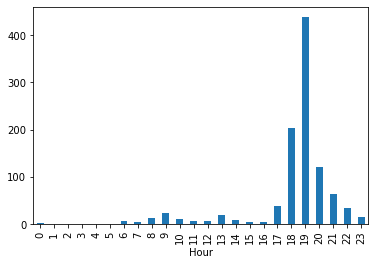

In [93]:
channel_data.groupby('Hour')['Reading'].mean().plot.bar()

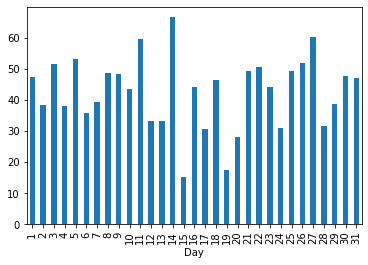

In [94]:
channel_data.groupby('Day')['Reading'].mean().plot.bar()

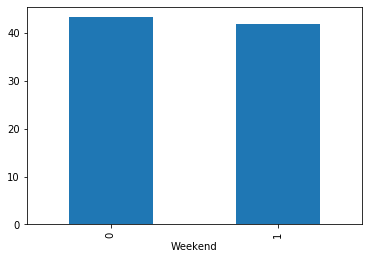

In [95]:
channel_data.groupby('Weekend')['Reading'].mean().plot.bar()

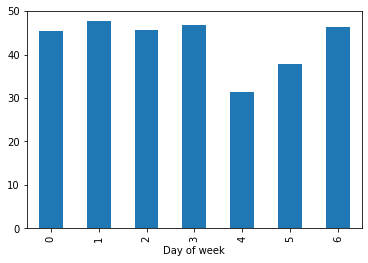

In [96]:
channel_data.groupby('Day of week')['Reading'].mean().plot.bar()

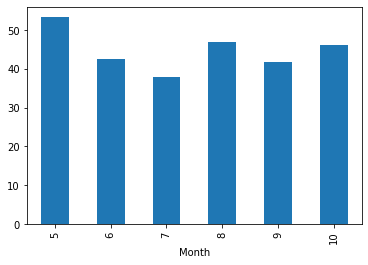

In [97]:
channel_data.groupby('Month')['Reading'].mean().plot.bar()

In [98]:
channel_data_copy = channel_data.copy()

channel_data_copy.Timestamp = pd.to_datetime(channel_data_copy.Timestamp, format = '%d-%m-%y %H:%M')
channel_data_copy.index = channel_data_copy.Timestamp

#Hourly
hourly = channel_data_copy.resample('H').mean()

#Daily
daily = channel_data_copy.resample('D').mean()

#Weekly
weekly = channel_data_copy.resample('W').mean()

#Monthly
monthly = channel_data_copy.resample('M').mean()

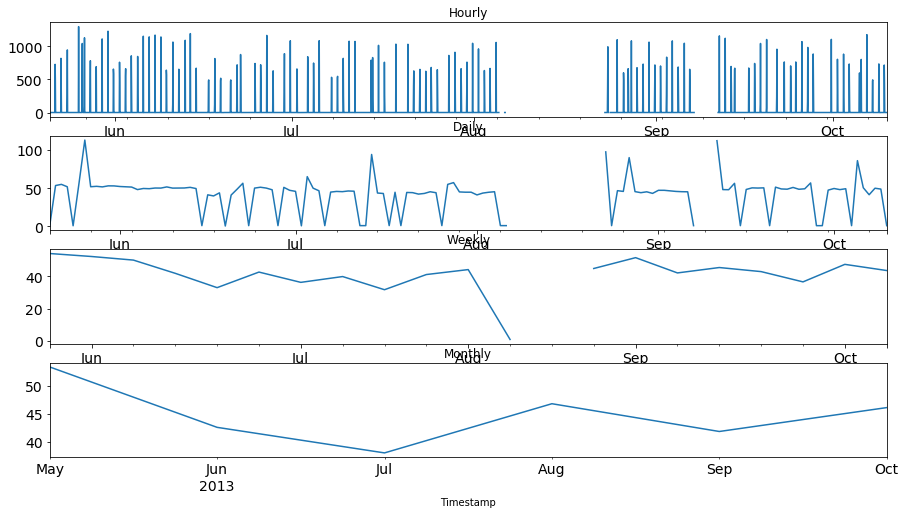

In [99]:
fig,axs = plt.subplots(4,1)

hourly.Reading.plot(figsize = (15,8), title = "Hourly", fontsize = 14, ax = axs[0])
daily.Reading.plot(figsize = (15,8), title = "Daily", fontsize = 14, ax = axs[1])
weekly.Reading.plot(figsize = (15,8), title = "Weekly", fontsize = 14, ax = axs[2])
monthly.Reading.plot(figsize = (15,8), title = "Monthly", fontsize = 14, ax = axs[3])

In [100]:
# channel_data.groupby(['Month','Day']).size().reset_index().rename(columns={0:'count'})

In [101]:
train = channel_data[channel_data['Month'] < 4]
test = channel_data[channel_data['Month'] == 4]

In [28]:
train.head()

,Timestamp,Reading,Year,Month,Day,Hour,Minute,Second,Day of week,Weekend
0,2013-02-27 12:35:26,1,2013,2,27,12,35,26,2,0
1,2013-02-27 12:35:33,1,2013,2,27,12,35,33,2,0
2,2013-02-27 12:35:39,1,2013,2,27,12,35,39,2,0
3,2013-02-27 12:35:45,1,2013,2,27,12,35,45,2,0
4,2013-02-27 12:35:51,1,2013,2,27,12,35,51,2,0


In [29]:
test.head()

,Timestamp,Reading,Year,Month,Day,Hour,Minute,Second,Day of week,Weekend
442684,2013-04-01 00:00:00,1,2013,4,1,0,0,0,0,0
442685,2013-04-01 00:00:07,1,2013,4,1,0,0,7,0,0
442686,2013-04-01 00:00:13,1,2013,4,1,0,0,13,0,0
442687,2013-04-01 00:00:19,1,2013,4,1,0,0,19,0,0
442688,2013-04-01 00:00:25,1,2013,4,1,0,0,25,0,0


In [30]:
test_copy = test.copy()

In [31]:
# def predict_reading(test, train):
    

In [32]:
test_copy['predicted'] = test.apply(lambda row : get_avg_reading(row), axis = 1)

In [33]:
test_copy.head()

,Timestamp,Reading,Year,Month,Day,Hour,Minute,Second,Day of week,Weekend,predicted
442684,2013-04-01 00:00:00,1,2013,4,1,0,0,0,0,0,0.931034
442685,2013-04-01 00:00:07,1,2013,4,1,0,0,7,0,0,0.931034
442686,2013-04-01 00:00:13,1,2013,4,1,0,0,13,0,0,0.931034
442687,2013-04-01 00:00:19,1,2013,4,1,0,0,19,0,0,0.931034
442688,2013-04-01 00:00:25,1,2013,4,1,0,0,25,0,0,0.931034


In [34]:
test_copy[1040:1050]['Reading']

443724    1
443725    1
443726    1
443727    1
443728    1
443729    1
443730    1
443731    1
443732    1
443733    1
Name: Reading, dtype: int64

In [35]:
test_copy[1041:1051]['predicted']

443725    81.602151
443726    81.602151
443727    81.602151
443728    81.602151
443729    81.602151
443730    81.602151
443731    81.602151
443732    81.602151
443733    81.602151
443734    81.602151
Name: predicted, dtype: float64

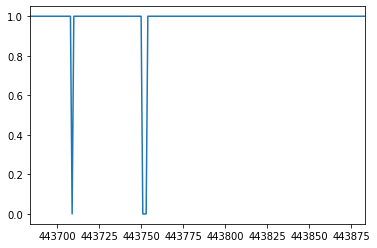

In [36]:
test_copy[1000:1200]['Reading'].plot()

In [37]:
test_copy.shape

(73160, 11)

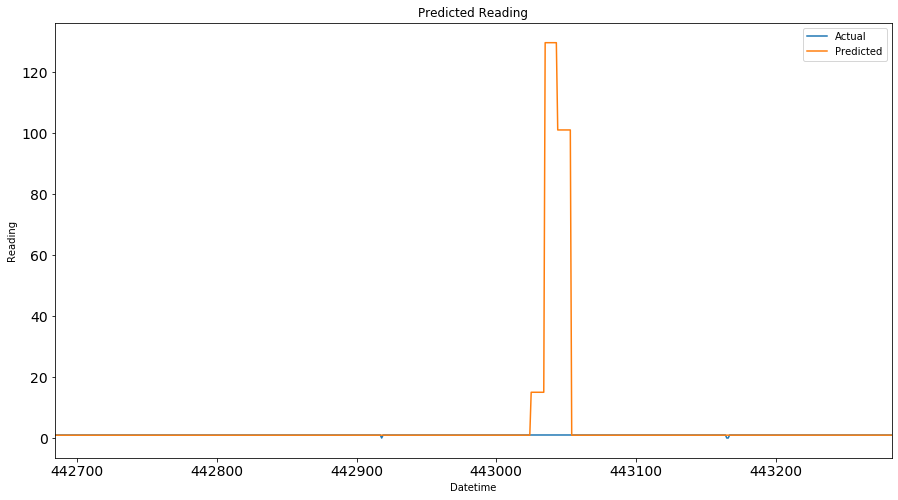

In [38]:
test_copy[0:600]['Reading'].plot(figsize = (15,8), title = 'Test Reading', fontsize = 14, label = 'Actual')
test_copy[0:600]['predicted'].plot(figsize = (15,8), title = 'Predicted Reading', fontsize =14, label = 'Predicted')
plt.xlabel('Datetime')
plt.ylabel('Reading')
plt.legend(loc = 'best')

### RMSE for simple average approach

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test_copy['Reading'], test_copy['predicted']))
rmse

212.66398748148288